# Email Spam Detection
#### Dataset

In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# data from https://www.kaggle.com/datasets/rockinjas123/spam-ham-emails
data = pd.read_csv('emails.csv')
data


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


#### Data Pre-Processing

In [3]:
print(f"Rows Before Pre-Pocessing: {len(data.index)}")

# drops duplicate rows. no need to have too many rows of the same values
data.drop_duplicates(inplace=True)

# since there are only 2 columns if any of them are null then those rows dont serve any functions
data.dropna(axis = 'index')

print(f"Rows After Pre-Pocessing: {len(data.index)}")

Rows Before Pre-Pocessing: 5728
Rows After Pre-Pocessing: 5695


In [4]:
x = data.text.values
y = data.spam.values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = 0.75, stratify = y)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

cv = CountVectorizer()

xTrain_cv = cv.fit_transform(xTrain)
xTest_cv = cv.transform(xTest)

mas = MaxAbsScaler()
mas.fit(xTrain_cv)
xTrainScaled = mas.transform(xTrain_cv)
xTestScaled = mas.transform(xTest_cv)

0    3245
1    1026
Name: spam, dtype: int64


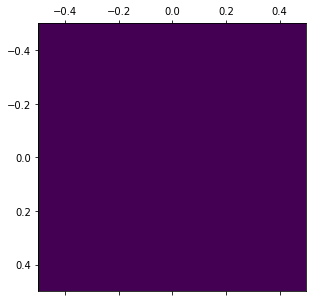

,cv,spam
0,"(0, 81)\t0.15000000000000002\n (0, 112)\t0....",0
1,"(0, 0)\t0.014705882352941176\n (0, 379)\t0....",0
2,"(0, 0)\t0.014705882352941176\n (0, 81)\t0.1...",0
3,"(0, 200)\t0.04\n (0, 218)\t0.04761904761904...",0
4,"(0, 1424)\t0.5\n (0, 3242)\t0.0714285714285...",0
...,...,...
4266,"(0, 147)\t1.0\n (0, 155)\t0.166666666666666...",0
4267,"(0, 67)\t1.0\n (0, 206)\t1.0\n (0, 209)\t1...",1
4268,"(0, 470)\t0.125\n (0, 515)\t0.0769230769230...",0
4269,"(0, 811)\t0.038461538461538464\n (0, 1951)\...",0


In [6]:
dataTrain = pd.DataFrame(data = {'cv':xTrainScaled, 'spam': yTrain})
print(dataTrain['spam'].value_counts())

import matplotlib.pyplot as plt

plt.matshow(dataTrain.corr())
plt.show()
dataTrain


#### Modelling Data
##### Multinomial Naive Bayes

In [7]:
from sklearn.naive_bayes import MultinomialNB as MNB

mnbModel = MNB()
mnbModel.fit(xTrainScaled, yTrain)


MultinomialNB()

In [8]:
customTests = [
  "Hello sir! When is the deadline for CSE422 project report submission?",
  "Dear Students, The University is happy to offer a student transport service and wishes to keep the price as low as feasible while covering the cost of the service. You all know that the price of fuel has increased significantly: the price of diesel has increased by 42.5% (Previous price- Tk.80, New price Tk.114).Bus fares have already been raised across the country. Despite the increase in the fuel price, the University will keep the student transport fares unchanged for the remainder of the current semester. There will be a need, however, to increase the fare to Tk. 90 from Tk.70 with effect from the start of the fall semester. The University hopes that you will understand the pressures that have led to this change. Best regards, Office of the Registrar",
  "ONLY BOYS CHECK MY BIO 😳🔞",
  "Click here to get free discord nitro"
  ]
customTests_cv = cv.transform(customTests)
customTestsScaled = mas.transform(customTests_cv)

def getCustomTestResults(model):
  results = model.predict(customTestsScaled)
  assert len(results) == len(customTests), f"length of results, {len(results)} and tests, {len(customTests)} are unequal"
  for i in range(len(results)):
    spam = "spam" if results[i] == 1 else "ok"
    if len(customTests[i]) > 80:
      print(f"{spam}  -->  \"{customTests[i][0:35]} ... {customTests[i][-35:]}\"")
    else:
      print(f"{spam}  -->  \"{customTests[i]}\"")

In [9]:
def display_score(trained_model, x, y):
  y_pred = trained_model.predict(x)
  acc = trained_model.score(x, y)
  prec = precision_score(y, y_pred)
  f1scre = f1_score(y, y_pred)
  print(f"Accuracy: {acc}\nPrecision: {prec}\nF Score: {f1scre}")

In [10]:
display_score(mnbModel, xTestScaled, yTest)

getCustomTestResults(mnbModel)

Accuracy: 0.9698033707865169
Precision: 0.9933993399339934
F Score: 0.9333333333333333
ok  -->  "Hello sir! When is the deadline for CSE422 project report submission?"
ok  -->  "Dear Students, The University is ha ... st regards, Office of the Registrar"
ok  -->  "ONLY BOYS CHECK MY BIO 😳🔞"
ok  -->  "Click here to get free discord nitro"


##### Support Vector Classifier

In [11]:
from sklearn.svm import SVC
svcModel = SVC(kernel="linear")
svcModel.fit(xTrainScaled, yTrain)

display_score(svcModel, xTestScaled, yTest)

getCustomTestResults(svcModel)

Accuracy: 0.9466292134831461
Precision: 0.9523809523809523
F Score: 0.8805031446540881
ok  -->  "Hello sir! When is the deadline for CSE422 project report submission?"
ok  -->  "Dear Students, The University is ha ... st regards, Office of the Registrar"
ok  -->  "ONLY BOYS CHECK MY BIO 😳🔞"
ok  -->  "Click here to get free discord nitro"


##### Ensemble Classifier (Random Forest)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=50)
rfcModel.fit(xTrainScaled, yTrain)

display_score(rfcModel, xTestScaled, yTest)

getCustomTestResults(rfcModel)

Accuracy: 0.961376404494382
Precision: 0.9897610921501706
F Score: 0.9133858267716535
ok  -->  "Hello sir! When is the deadline for CSE422 project report submission?"
ok  -->  "Dear Students, The University is ha ... st regards, Office of the Registrar"
ok  -->  "ONLY BOYS CHECK MY BIO 😳🔞"
spam  -->  "Click here to get free discord nitro"
